# Random Forest Model

In [3]:
import pandas as pd

df = pd.read_csv('training/2015-08-12-15-04-18/gps.csv')
# df.columns[df.isnull().any()]
# df.columns
# print(df['utm_zone'].value_counts())

pose_timestamps = df['timestamp'].tolist()
origin_timestamp = pose_timestamps[0]
print(origin_timestamp)

# print(target_timestamps)
# print(df['num_satellites'].value_counts()) 
print(len(df))
gps_lat = df['latitude']
gps_lon = df['longitude']
gps_north = df['northing']
gps_east = df['easting']
model_df = df
model_df

series = model_df.iloc[0:10].copy()

# How to resample our dataframe according to what we want
series['timestamp'] = pd.to_datetime(series['timestamp'], unit = 'us')
initial_timestamp = series['timestamp']
print(f'Initial timestamp is {initial_timestamp[0]}')

series.set_index('timestamp', inplace = True)
series.resample('200ms', origin = 'start').interpolate(method='linear')

print(len(series))

1439388262802747
11456
Initial timestamp is 2015-08-12 14:04:22.802747
10


In [183]:
# https://stackoverflow.com/questions/55765474/how-to-interpolate-data-with-timestamp-indices-in-python

# 'floor' date to seconds
# series['timestamp'] = pd.to_datetime(series['timestamp'], origin='unix', unit = 'microsecond', utc = True)


# 1439388262802747, 1439388263002747, 1439388263202747		

# print(series)
# new rangeprint(pd.to_datetime(df['timestamp'], unit = 'us'))
# new_range = pd.date_range(series.timestamp[0], series.timestamp.values[-1], freq='9S')

# resample and interpolate
# series.set_index('timestamp').reindex(new_range).interpolate().reset_index()
# print(pd.to_datetime([1439388262.802747, 1439388263.002747, 1439388263.202747], unit="s"))
# print(pd.to_datetime([1439388262802747, 1439388263002747, 1439388263202747], unit="us"))



0       2015-08-12 14:04:22.802747
1       2015-08-12 14:04:23.002747
2       2015-08-12 14:04:23.202747
3       2015-08-12 14:04:23.402746
4       2015-08-12 14:04:23.602746
                   ...            
11451   2015-08-12 14:42:33.003874
11452   2015-08-12 14:42:33.203874
11453   2015-08-12 14:42:33.403875
11454   2015-08-12 14:42:33.603875
11455   2015-08-12 14:42:33.803875
Name: timestamp, Length: 11456, dtype: datetime64[ns]
DatetimeIndex(['2015-08-12 14:04:22.802747', '2015-08-12 14:04:23.002747',
               '2015-08-12 14:04:23.202747'],
              dtype='datetime64[ns]', freq=None)
0   1970-01-17 15:49:48+00:00
1   1970-01-17 15:49:48+00:00
2   1970-01-17 15:49:48+00:00
3   1970-01-17 15:49:48+00:00
4   1970-01-17 15:49:48+00:00
5   1970-01-17 15:49:48+00:00
6   1970-01-17 15:49:48+00:00
7   1970-01-17 15:49:48+00:00
8   1970-01-17 15:49:48+00:00
9   1970-01-17 15:49:48+00:00
Name: timestamp, dtype: datetime64[ns, UTC]


In [4]:
print(df['num_satellites'].value_counts()) 

7     2874
6     2637
5     2259
4     1501
8     1374
3      382
9      305
10      61
2       57
1        6
Name: num_satellites, dtype: int64


In [5]:
df1 = pd.read_csv('training/2015-08-12-15-04-18/ins.csv')
# df1['ins_status']
# df1.columns[df1.isnull().any()]
# marks_list = df1['ins_status'].tolist()
# print(df1['ins_status'].value_counts()) % get the count of each unique parameter in the column 'ins_status'
df1
ins_lat = df1['latitude']
ins_lon = df1['longitude']
ins_north = df1['northing']
ins_east = df1['easting']

# series_ins = df1.iloc[0:100]

# print(pd.to_datetime(df1['timestamp'], unit = 'us'))

In [6]:
df2 = pd.read_csv('training/2015-08-12-15-04-18/rtk.csv')
df2
# df2.columns[df2.isnull().any()]
rtk_lat = df2['latitude']
rtk_lon = df2['longitude']
rtk_north = df2['northing']
rtk_east = df2['easting']

series_rtk = df2.iloc[0:20]

print(pd.to_datetime(df2['timestamp'], unit = 'us'))


0       2015-08-12 14:04:22.802747
1       2015-08-12 14:04:22.909414
2       2015-08-12 14:04:23.014176
3       2015-08-12 14:04:23.105604
4       2015-08-12 14:04:23.197033
                   ...            
22906   2015-08-12 14:42:33.410542
22907   2015-08-12 14:42:33.517208
22908   2015-08-12 14:42:33.623875
22909   2015-08-12 14:42:33.730542
22910   2015-08-12 14:42:33.828875
Name: timestamp, Length: 22911, dtype: datetime64[ns]


Original len is 11456


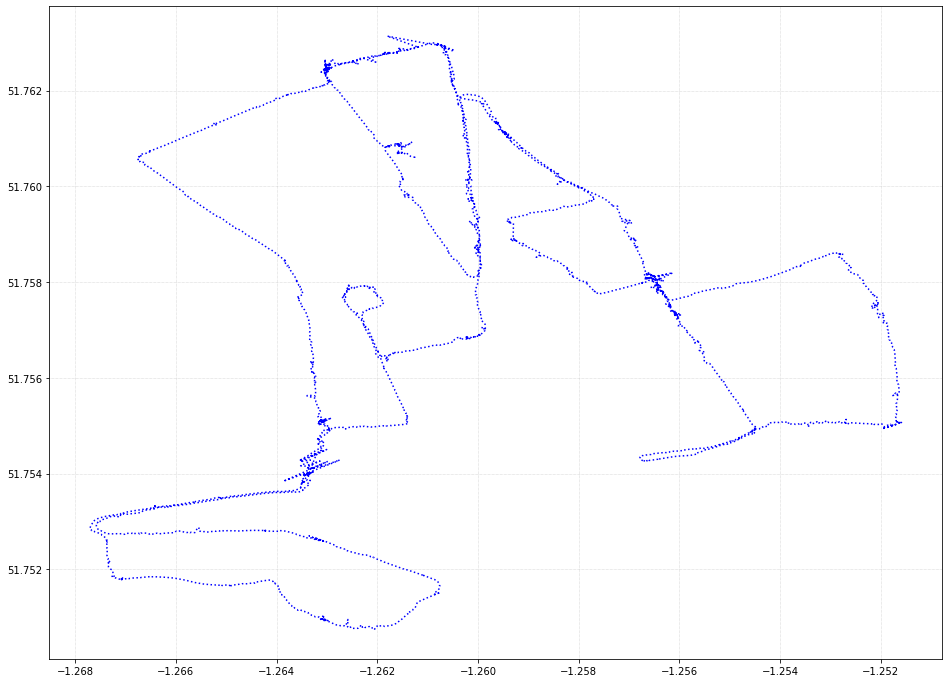

In [12]:
import matplotlib.pyplot as plt

df = pd.read_csv('training/2015-08-12-15-04-18/gps.csv')
print(f'Original len is {len(df)}')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit = 'us')
initial_timestamp = df['timestamp']
df.set_index('timestamp', inplace = True)
upsample = df.resample('200ms', origin = 'start')
gps = upsample.ffill()

# gps = df.resample('200ms', origin = 'start').interpolate(method='linear')

# print(f'Initial timestamp is {initial_timestamp[0]}, final timestamp is {initial_timestamp[11455]}  length is: {len(gps)}')
gps

figure = plt.gcf()
figure.set_size_inches(16,12)

plt.plot(gps['longitude'],gps['latitude'],'b:')
# plt.plot(gps['longitude'][0],gps['latitude'][0],'r*')
plt.grid(linestyle=':',linewidth=0.5)

Original len is 114561


,ins_status,latitude,longitude,altitude,northing,easting,down,utm_zone,velocity_north,velocity_east,velocity_down,roll,pitch,yaw
timestamp,,,,,,,,,,,,,,
2015-08-12 14:04:22.802747,INS_ALIGNMENT_COMPLETE,51.760597,-1.261247,114.284188,5.735842e+06,619997.735406,-114.284188,30U,-0.014230,-0.012981,0.001167,0.041498,0.006991,4.745905
2015-08-12 14:04:23.002747,INS_ALIGNMENT_COMPLETE,51.760597,-1.261247,114.284616,5.735842e+06,619997.745111,-114.284616,30U,-0.008610,-0.009942,0.001832,0.041764,0.006839,4.745868
2015-08-12 14:04:23.202747,INS_ALIGNMENT_COMPLETE,51.760597,-1.261247,114.284423,5.735842e+06,619997.742954,-114.284423,30U,-0.012198,-0.011781,0.000832,0.041708,0.006833,4.745866
2015-08-12 14:04:23.402747,INS_ALIGNMENT_COMPLETE,51.760597,-1.261247,114.284155,5.735842e+06,619997.740797,-114.284155,30U,-0.010022,-0.011145,0.001088,0.041725,0.006851,4.745879
2015-08-12 14:04:23.602747,INS_ALIGNMENT_COMPLETE,51.760597,-1.261247,114.283823,5.735842e+06,619997.738604,-114.283823,30U,-0.014170,-0.010856,0.002007,0.041747,0.006834,4.745871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-12 14:42:33.002747,INS_SOLUTION_GOOD,51.760835,-1.261764,108.787970,5.735868e+06,619961.447599,-108.787970,30U,-0.029561,-0.055207,-0.007068,0.001099,-0.012628,1.258403
2015-08-12 14:42:33.202747,INS_SOLUTION_GOOD,51.760835,-1.261763,108.793289,5.735868e+06,619961.482063,-108.793289,30U,-0.026230,-0.051035,-0.009839,0.001143,-0.012644,1.258469
2015-08-12 14:42:33.402747,INS_SOLUTION_GOOD,51.760835,-1.261764,108.795507,5.735868e+06,619961.471682,-108.795507,30U,-0.026342,-0.053239,-0.011772,0.001042,-0.012640,1.258480


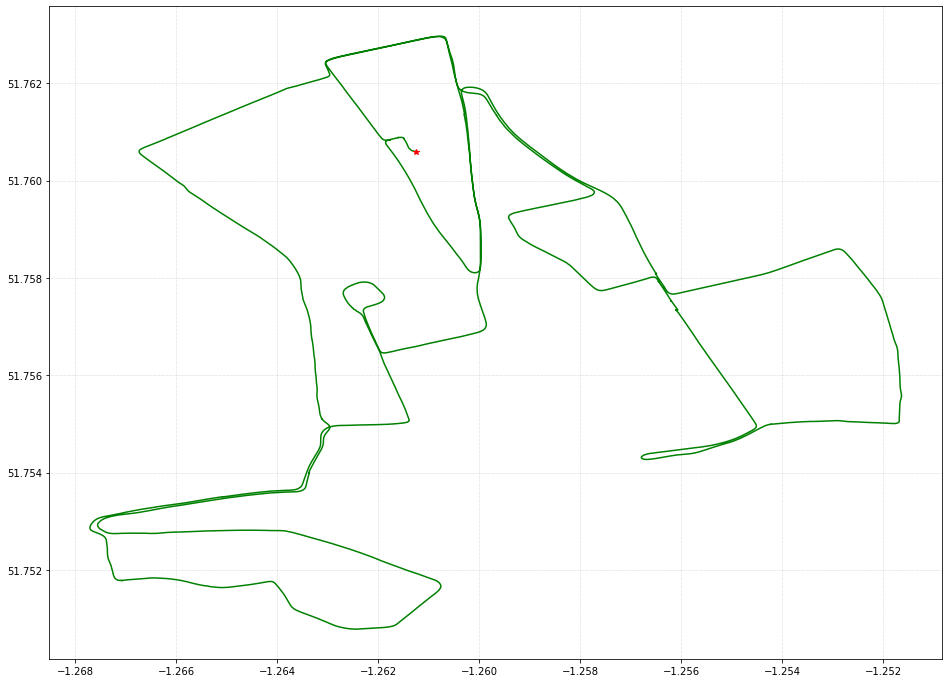

In [14]:
import matplotlib.pyplot as plt

df1 = pd.read_csv('training/2015-08-12-15-04-18/ins.csv')
print(f'Original len is {len(df1)}')
df1['timestamp'] = pd.to_datetime(df1['timestamp'], unit = 'us')
initial_timestamp = df1['timestamp']
df1.set_index('timestamp', inplace = True)
# ins_old = df1.resample('200ms', origin = 'start').interpolate(method='linear').copy()
ins_old = df1.resample('200ms', origin = 'start').ffill()

# print(f'Initial timestamp is {initial_timestamp[0]}, final timestamp is {initial_timestamp[114560]} length is: {len(ins)}')
ins = ins_old.iloc[:-1].copy()
ins

figure = plt.gcf()
figure.set_size_inches(16,12)
# plt.plot(rtk['longitude'],rtk['latitude'],'r:')
plt.plot(ins['longitude'],ins['latitude'],'g')
# plt.plot(gps['longitude'],gps['latitude'],'b:')
plt.plot(ins['longitude'][0],ins['latitude'][0],'r*')
plt.grid(linestyle=':',linewidth=0.5)

ins


Original len is 22911
2015-08-12 14:42:33.828875


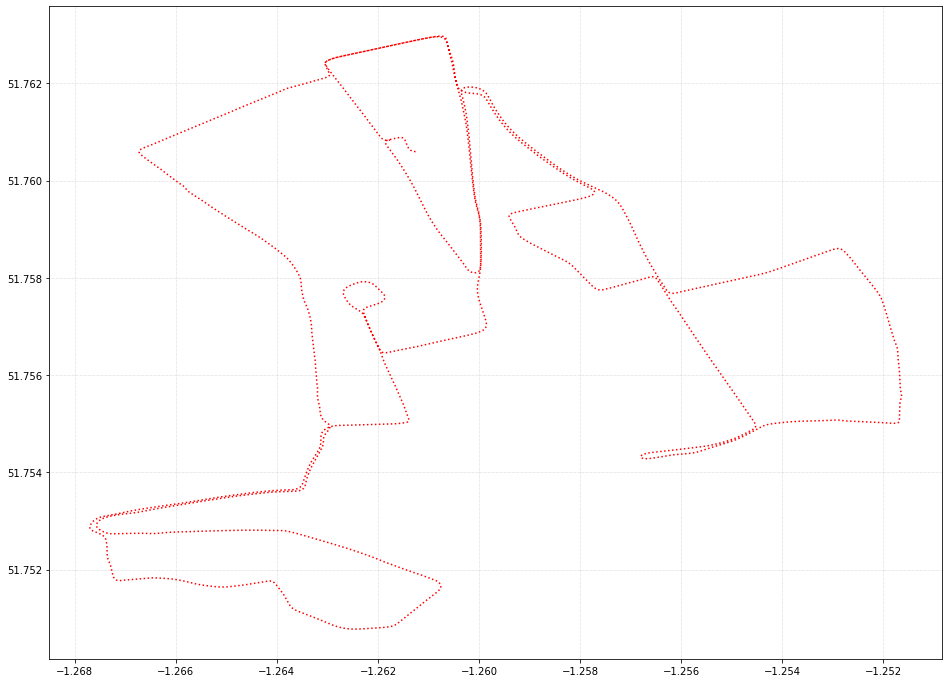

In [18]:
import matplotlib.pyplot as plt

df2 = pd.read_csv('training/2015-08-12-15-04-18/rtk.csv')
print(f'Original len is {len(df2)}')
df2['timestamp'] = pd.to_datetime(df2['timestamp'], unit = 'us')
initial_timestamp = df2['timestamp']
print(initial_timestamp[22910])
df2.set_index('timestamp', inplace = True)
# rtk = df2.resample('200ms', origin = 'start').interpolate(method='linear').copy()
rtk = df2.resample('200ms', origin = 'start').ffill()

# print(f'Initial timestamp is {initial_timestamp[0]}, final timestamp is {initial_timestamp[22910]}  length is: {len(rtk)}')


figure = plt.gcf()
figure.set_size_inches(16,12)
plt.plot(rtk['longitude'],rtk['latitude'],'r:')
# plt.plot(ins['longitude'],ins['latitude'],'g')
# plt.plot(gps['longitude'],gps['latitude'],'b:')
# plt.plot(gps['longitude'][0],gps['latitude'][0],'r*')
plt.grid(linestyle=':',linewidth=0.5)
# rtk

In [19]:
# build_df = [gps.iloc[:,], ins, rtk]
# build_df

# build_df = [gps.iloc[:,0:10], ins.iloc[:, 8:14], rtk.iloc[:,:5]]


# data = [gps.iloc[:,0:10], ins.iloc[:, 8:14], rtk.iloc[:,:5]]
# headers = ['num_sat', 'lat', 'lon', 'alt', 'lat_sigma', 'lon_sigma', 'alt_sigma', 'northing', 'easting', 'down', 'vel_north', 'vel_east', 'vel_down', 'roll', 'pitch', 'yaw','latt', 'lont', 'altt','northingt','eastingt']

# df3 = pd.concat(data, axis = 1, keys = headers)
# print(df3)

gps_noindex = gps.copy()
ins_noindex = ins.copy()
rtk_noindex = rtk.copy()

gps_noindex = gps_noindex.rename(columns={'num_satellites':'num_sat', 'latitude':'lat_gps', 'longitude':'lon_gps', 'altitude':'alt_gps', 'latitude_sigma':'lat_sigma', 'longitude_sigma':'lon_sigma', 
       'altitude_sigma':'alt_sigma', 'northing':'north_gps', 'easting':'east_gps', 'down':'down_gps'})
ins_noindex = ins_noindex.rename(columns={'velocity_north':'vel_north_ins', 'velocity_east':'vel_east_ins', 'velocity_down':'vel_down_ins', 'roll':'roll_ins', 'pitch':'pitch_ins',
       'yaw':'yaw_ins'})
rtk_noindex = rtk_noindex.rename(columns={'latitude':'lat_rtk', 'longitude':'lon_rtk', 'altitude':'alt_rtk', 'northing':'north_rtk', 'easting':'east_rtk', 'down':'down_rtk'})       

gps_noindex = gps_noindex.reset_index(drop=True)
ins_noindex = ins_noindex.reset_index(drop=True)
rtk_noindex = rtk_noindex.reset_index(drop=True)
# print(gps_noindex)

data = [gps_noindex.iloc[:,0:10], ins_noindex.iloc[:, 8:14], rtk_noindex.iloc[:,:6]]
# headers = ['num_sat', 'lat', 'lon', 'alt', 'lat_sigma', 'lon_sigma', 'alt_sigma', 'northing', 'easting', 'down', 'vel_north', 'vel_east', 'vel_down', 'roll', 'pitch', 'yaw','latt', 'lont', 'altt','northingt','eastingt']

df3 = pd.concat(data, axis = 1)
df3.columns

# df3 = df3.rename(columns={'num_satellites':'num_sat', 'latitude':'lat_gps', 'longitude':'lon_gps', 'altitude':'alt_gps', 'latitude_sigma':'lat_sigma', 'longitude_sigma':'lon_sigma', 
#        'altitude_sigma':'alt_sigma', 'northing':'north_gps', 'easting':'east_gps', 'down':'down_gps',
#        'velocity_north':'vel_north_ins', 'velocity_east':'vel_east_ins', 'velocity_down':'vel_down_ins', 'roll':'roll_ins', 'pitch':'pitch_ins',
#        'yaw':'yaw_ins', 'latitude':'lat_rtk', 'longitude':'lon_rtk', 'altitude':'alt_rtk', 'northing':'north_rtk', 'easting':'east_rtk', 'down':'down_rtk'})

# ['num_satellites', 'latitude', 'longitude', 'altitude', 'latitude_sigma',
#        'longitude_sigma', 'altitude_sigma', 'northing', 'easting', 'down',
#        'velocity_north', 'velocity_east', 'velocity_down', 'roll', 'pitch',
#        'yaw', 'latitude', 'longitude', 'altitude', 'northing', 'easting']

##### Errors in GPS using northing/easting
df3['northing_error'] = np.abs(df3['north_gps']-df3['north_rtk'])
df3['easting_error'] = np.abs(df3['east_gps']-df3['east_rtk'])
df3['horizontal_error'] = np.sqrt(df3['northing_error']**2+df3['easting_error']**2)

df3['labels_cm'] = np.where(df3['horizontal_error']>10, True, False)

# ##### Errors in GPS using northing/easting using geopy distance
# df3['northing_error'] = np.abs(df3['north_gps']-df3['north_rtk'])
# df3['easting_error'] = np.abs(df3['east_gps']-df3['east_rtk'])
# df3['horizontal_error'] = np.sqrt(df3['northing_error']**2+df3['easting_error']**2)

# df3['labels_cm'] = np.where(df3['horizontal_error']>10, True, False)

##### Errors in GPS using latitude/longitude
df3['lat_error'] = np.abs(df3['lat_gps']-df3['lat_rtk'])
df3['lon_error'] = np.abs(df3['lon_gps']-df3['lon_rtk'])
df3['deg_error'] = np.sqrt(df3['lat_error']**2+df3['lon_error']**2)

df3['labels_deg'] = np.where(df3['deg_error']>0.0001, True, False)

df3.head()

##### Running distance in GPS
# df3['run_distance'] = np.abs(df3['lat_gps']-df3['lat_rtk'])
# df3['lon_error'] = np.abs(df3['lon_gps']-df3['lon_rtk'])
# df3['deg_error'] = np.sqrt(df3['lat_error']**2+df3['lon_error']**2)

# df3['labels_deg'] = np.where(df3['deg_error']>0.0001, True, False)

# df3.head()
# df3[df3['labels_deg']==True]
# df3[df3['labels_cm']==True]


,num_sat,lat_gps,lon_gps,alt_gps,lat_sigma,lon_sigma,alt_sigma,north_gps,east_gps,down_gps,...,east_rtk,down_rtk,northing_error,easting_error,horizontal_error,labels_cm,lat_error,lon_error,deg_error,labels_deg
0,9,51.760608,-1.261255,68.932093,2.098110,1.597030,5.599122,5.735843e+06,619997.177193,-68.932093,...,619997.103467,-111.009598,1.400986,0.073726,1.402925,False,0.000013,0.000001,0.000013,False
1,9,51.760608,-1.261255,68.927470,2.097983,1.597024,5.599248,5.735843e+06,619997.176174,-68.927470,...,619997.103004,-111.012161,1.391281,0.073170,1.393204,False,0.000013,0.000001,0.000013,False
2,9,51.760608,-1.261255,68.921052,2.098029,1.597101,5.599438,5.735843e+06,619997.185102,-68.921052,...,619997.100627,-111.025429,1.389240,0.084475,1.391806,False,0.000013,0.000001,0.000013,False
3,9,51.760608,-1.261255,68.921958,2.097997,1.597131,5.599644,5.735843e+06,619997.183469,-68.921958,...,619997.101363,-111.021690,1.389680,0.082106,1.392104,False,0.000013,0.000001,0.000013,False
4,9,51.760608,-1.261255,68.927044,2.097923,1.597114,5.599744,5.735843e+06,619997.187288,-68.927044,...,619997.102373,-111.016144,1.399662,0.084915,1.402235,False,0.000013,0.000001,0.000013,False


With error = 1 the number of occurrences is 8768
With error = 10 the number of occurrences is 523


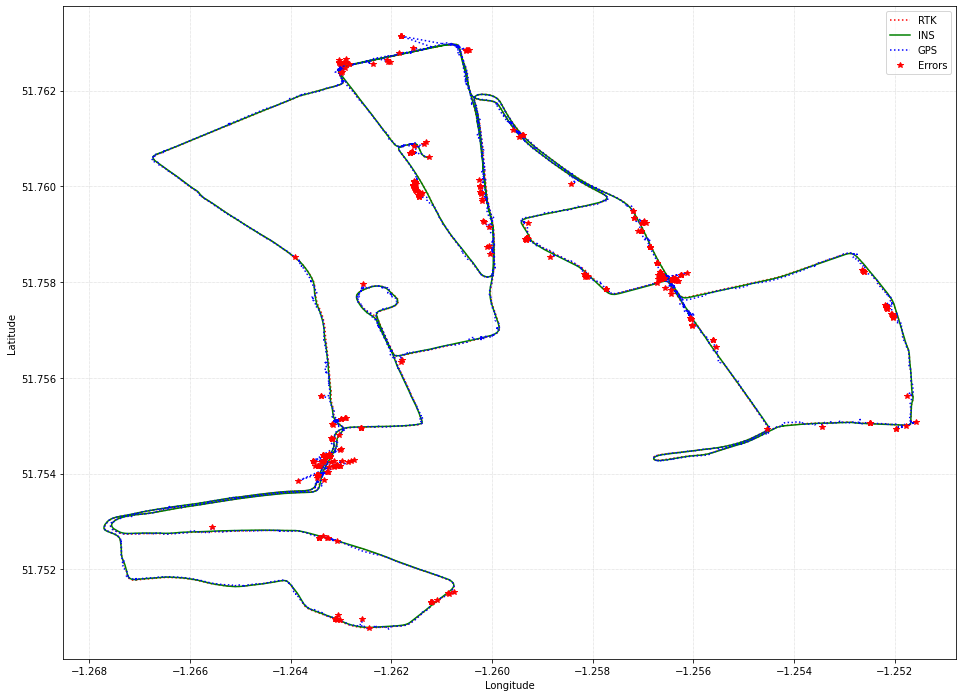

In [21]:
import numpy as np
import geopy.distance
from geopy.distance import geodesic as GD
from geopy.distance import great_circle as GRC
from math import radians, cos, sin, asin, sqrt

def geo_dist_rtk_gps(df):
    return GD(df.coord_gps, df.coord_rtk).m

def gg_dist_rtk_gps(df):
    return GRC(df.coord_gps, df.coord_rtk).m

# Form tuple column from two columns in Pandas

new_df=pd.DataFrame([])
new_df['coord_gps'] = list(zip(df3.lon_gps,df3.lat_gps))
new_df['coord_rtk'] = list(zip(df3.lon_rtk,df3.lat_rtk))
new_df['geo_dist_gps_rtk'] = new_df.apply(geo_dist_rtk_gps, axis=1)
new_df['gg_dist_gps_rtk'] = new_df.apply(gg_dist_rtk_gps, axis=1)

# new_df
for error_distance in range(20):
# for error_distance in [1,10]:
    # error_distance = 2
    new_df['labels_m'] = np.where(new_df['geo_dist_gps_rtk']>error_distance, True, False)

    other = new_df[new_df['labels_m']==True]

    print(f'With error = {error_distance} the number of occurrences is {len(other)}')

    error_locations = other.index.values.tolist()

    # print(rtk['longitude'][error_locations])

    figure = plt.gcf()
    plt.clf()
    figure.set_size_inches(16,12)
    plt.plot(rtk['longitude'],rtk['latitude'],'r:', label='RTK')
    plt.plot(ins['longitude'],ins['latitude'],'g', label='INS')
    plt.plot(gps['longitude'],gps['latitude'],'b:', label='GPS')

    plt.plot(gps['longitude'][error_locations],gps['latitude'][error_locations],'r*', label='Errors')

    plt.plot(gps['longitude'][0],gps['latitude'][0],'r*')
    plt.grid(linestyle=':',linewidth=0.5)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    fig_name = f'Errors_geq_{error_distance}'
    plt.savefig(fig_name,dpi=200)

# df3[df3['labels_deg']==True]

# print("The geodesic distance is: ", GD((df3['lon_gps'][i],df3['lat_gps'][i]),(df3['lon_rtk'][i],df3['lat_rtk'][i])).m)


In [275]:
new_df['labels_m'] = np.where(new_df['geo_dist_gps_rtk']>5, True, False)

col = 'geo_dist_gps_rtk'
conditions = [new_df[col]<=1, (new_df[col]>1) & (new_df[col]<=5), (new_df[col]>5) & (new_df[col]<=10), (new_df[col]>10)]
# choices = ['lowest', 'low', 'high', 'highest']
choices = [int(0),int(1),int(2),int(3)] # 0:lowest, 1:low, 2:high, 3:highest
new_df['type_error'] = np.select(conditions, choices, default = np.nan)

# n_lowest = len(new_df[new_df['type_error']=='lowest'])
# n_low = len(new_df[new_df['type_error']=='low'])
# n_high = len(new_df[new_df['type_error']=='high'])
# n_highest = len(new_df[new_df['type_error']=='highest'])

n_lowest = len(new_df[new_df['type_error']==0])
n_low = len(new_df[new_df['type_error']==1])
n_high = len(new_df[new_df['type_error']==2])
n_highest = len(new_df[new_df['type_error']==3])

print(f'Lowest is {n_lowest}, Low is {n_low}, High is {n_high} and Highest is {n_highest}')
# print(f'Lowest is {len(new_df[new_df['type_error']=='low'])}')

# print(f'Lowest is {len(new_df[new_df['type_error']==True])}' )

Lowest is 2688, Low is 6982, High is 1263 and Highest is 523


In [276]:
new_df

,coord_gps,coord_rtk,geo_dist_gps_rtk,gg_dist_gps_rtk,labels_m,type_error
0,"(-1.261255, 51.760608)","(-1.2612564167, 51.7605952791)",1.424384,1.422906,False,1.0
1,"(-1.261255, 51.760608)","(-1.2612564233, 51.7605952818)",1.424165,1.422689,False,1.0
2,"(-1.261255, 51.760608)","(-1.2612564572, 51.7605952961)",1.423003,1.421534,False,1.0
3,"(-1.261255, 51.760608)","(-1.2612564467, 51.7605952917)",1.423359,1.421887,False,1.0
4,"(-1.261255, 51.760608)","(-1.2612564323, 51.7605952857)",1.423844,1.422370,False,1.0
...,...,...,...,...,...,...
11451,"(-1.261762, 51.760831)","(-1.2617618709, 51.7608346683)",0.408504,0.408051,False,0.0
11452,"(-1.261761, 51.760832)","(-1.2617618839, 51.7608346609)",0.311850,0.311708,False,0.0
11453,"(-1.26176, 51.760833)","(-1.2617618948, 51.7608346509)",0.278667,0.279417,False,0.0
11454,"(-1.26176, 51.760826)","(-1.2617618928, 51.760834673)",0.987672,0.986866,False,0.0


In [284]:
# Let us build the training data

headers = [df3.loc[:,['num_sat', 'lat_gps', 'lon_gps', 'alt_gps', 'lat_sigma', 'lon_sigma',
       'alt_sigma', 'north_gps', 'east_gps', 'down_gps', 'vel_north_ins',
       'vel_east_ins', 'vel_down_ins', 'roll_ins', 'pitch_ins', 'yaw_ins']
       ], new_df.loc[:,['geo_dist_gps_rtk','type_error']]]
training_df = pd.concat(headers, axis = 1)

full_df = training_df.copy()

full_df

,num_sat,lat_gps,lon_gps,alt_gps,lat_sigma,lon_sigma,alt_sigma,north_gps,east_gps,down_gps,vel_north_ins,vel_east_ins,vel_down_ins,roll_ins,pitch_ins,yaw_ins,geo_dist_gps_rtk,type_error
0,9,51.760608,-1.261255,68.932093,2.098110,1.597030,5.599122,5.735843e+06,619997.177193,-68.932093,-0.014230,-0.012981,0.001167,0.041498,0.006991,4.745905,1.424384,1.0
1,9,51.760608,-1.261255,68.927470,2.097983,1.597024,5.599248,5.735843e+06,619997.176174,-68.927470,-0.008610,-0.009942,0.001832,0.041764,0.006839,4.745868,1.424165,1.0
2,9,51.760608,-1.261255,68.921052,2.098029,1.597101,5.599438,5.735843e+06,619997.185102,-68.921052,-0.012198,-0.011781,0.000832,0.041708,0.006833,4.745866,1.423003,1.0
3,9,51.760608,-1.261255,68.921958,2.097997,1.597131,5.599644,5.735843e+06,619997.183469,-68.921958,-0.010022,-0.011145,0.001088,0.041725,0.006851,4.745879,1.423359,1.0
4,9,51.760608,-1.261255,68.927044,2.097923,1.597114,5.599744,5.735843e+06,619997.187288,-68.927044,-0.014170,-0.010856,0.002007,0.041747,0.006834,4.745871,1.423844,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11451,10,51.760831,-1.261762,62.407233,1.872551,1.432219,3.647499,5.735867e+06,619961.590052,-62.407233,-0.029561,-0.055207,-0.007068,0.001099,-0.012628,1.258403,0.408504,0.0
11452,10,51.760832,-1.261761,62.510769,1.872550,1.432213,3.647423,5.735867e+06,619961.652986,-62.510769,-0.026230,-0.051035,-0.009839,0.001143,-0.012644,1.258469,0.311850,0.0
11453,10,51.760833,-1.261760,62.501980,1.870211,1.428933,3.642872,5.735867e+06,619961.702367,-62.501980,-0.026342,-0.053239,-0.011772,0.001042,-0.012640,1.258480,0.278667,0.0
11454,10,51.760826,-1.261760,63.597929,1.666002,1.418141,3.359005,5.735867e+06,619961.742779,-63.597929,-0.027105,-0.052281,-0.012674,0.001094,-0.012663,1.258477,0.987672,0.0


In [258]:
# Process to separate categorical variables and turn them into numerical variables through one-hot encoding

# full_df = pd.get_dummies(full_df)

# full_df.iloc[:,5:].head(5)

,lon_sigma,alt_sigma,north_gps,east_gps,down_gps,vel_north_ins,vel_east_ins,vel_down_ins,roll_ins,pitch_ins,yaw_ins,geo_dist_gps_rtk,type_error_high,type_error_highest,type_error_low,type_error_lowest
0,1.597030,5.599122,5.735843e+06,619997.177193,-68.932093,-0.014230,-0.012981,0.001167,0.041498,0.006991,4.745905,1.424384,0,0,1,0
1,1.597024,5.599248,5.735843e+06,619997.176174,-68.927470,-0.008610,-0.009942,0.001832,0.041764,0.006839,4.745868,1.424165,0,0,1,0
2,1.597101,5.599438,5.735843e+06,619997.185102,-68.921052,-0.012198,-0.011781,0.000832,0.041708,0.006833,4.745866,1.423003,0,0,1,0
3,1.597131,5.599644,5.735843e+06,619997.183469,-68.921958,-0.010022,-0.011145,0.001088,0.041725,0.006851,4.745879,1.423359,0,0,1,0
4,1.597114,5.599744,5.735843e+06,619997.187288,-68.927044,-0.014170,-0.010856,0.002007,0.041747,0.006834,4.745871,1.423844,0,0,1,0


In [278]:
full_df.columns

Index(['num_sat', 'lat_gps', 'lon_gps', 'alt_gps', 'lat_sigma', 'lon_sigma',
       'alt_sigma', 'north_gps', 'east_gps', 'down_gps', 'vel_north_ins',
       'vel_east_ins', 'vel_down_ins', 'roll_ins', 'pitch_ins', 'yaw_ins',
       'geo_dist_gps_rtk', 'type_error'],
      dtype='object')

In [259]:
training_df.describe()

,num_sat,lat_gps,lon_gps,alt_gps,lat_sigma,lon_sigma,alt_sigma,north_gps,east_gps,down_gps,vel_north_ins,vel_east_ins,vel_down_ins,roll_ins,pitch_ins,yaw_ins,geo_dist_gps_rtk
count,11456.000000,11456.000000,11456.000000,11456.000000,11456.000000,11456.000000,11456.000000,1.145600e+04,11456.000000,11456.000000,11456.000000,11456.000000,11456.000000,11456.000000,11456.000000,11456.000000,11456.000000
mean,6.009689,51.757077,-1.260927,62.184365,4.657336,4.489539,10.309064,5.735451e+06,620029.152236,-62.184365,0.010022,-0.033533,0.000802,-0.002875,-0.010301,3.672759,3.192675
std,1.472516,0.003402,0.003870,6.064734,6.027459,7.887327,11.952628,3.800845e+02,264.874385,6.064734,3.684387,3.047823,0.077856,0.023327,0.015905,1.781775,4.941994
min,1.000000,51.750752,-1.267708,-7.157591,0.926377,0.796497,1.544948,5.734746e+06,619572.377817,-144.130823,-7.727184,-7.970097,-0.593331,-0.063206,-0.079412,0.000270,0.010823
25%,5.000000,51.753999,-1.263428,59.334664,2.458500,1.956968,5.575336,5.735105e+06,619863.100696,-64.457883,-2.301106,-1.475354,-0.037721,-0.019187,-0.017369,2.403602,1.047440
50%,6.000000,51.757434,-1.261383,62.301406,3.141266,2.329378,7.681394,5.735492e+06,619997.238361,-62.301406,-0.001875,-0.009337,-0.004747,-0.007836,-0.011052,3.447656,1.867967
75%,7.000000,51.760271,-1.258926,64.457883,5.216881,5.065054,9.744344,5.735805e+06,620159.890148,-59.334664,1.850472,1.667138,0.029735,0.010922,-0.004137,5.545831,3.315343
max,10.000000,51.763137,-1.251586,144.130823,216.760193,163.097610,263.865601,5.736123e+06,620679.183691,7.157591,9.015801,7.644932,0.783081,0.082623,0.062891,6.282728,94.414860


## Create numpy array from pandas dataframe to use in the Regressor

In [ ]:
# Convert Pandas dataframe to numpy array to work in the algorithm

import numpy as np

# Labels are the values we want to predict, we want to predict the error in the GPS measurement
labels = np.array(training_df['geo_dist_gps_rtk'])

# Remove the labels from the features
# axis 1 refers to the columns

training_df = training_df.drop('geo_dist_gps_rtk', axis = 1)


In [233]:
training_df = training_df.drop(['type_error_high', 'type_error_highest', 'type_error_low',
       'type_error_lowest'], axis = 1)

In [234]:
# Saving feature names for later use
feature_list = list(training_df.columns)
# Convert to numpy array
features = np.array(training_df)

In [235]:
print(features)

[[ 9.0000000e+00  5.1760608e+01 -1.2612550e+00 ...  4.1498000e-02
   6.9910000e-03  4.7459050e+00]
 [ 9.0000000e+00  5.1760608e+01 -1.2612550e+00 ...  4.1764000e-02
   6.8390000e-03  4.7458680e+00]
 [ 9.0000000e+00  5.1760608e+01 -1.2612550e+00 ...  4.1708000e-02
   6.8330000e-03  4.7458660e+00]
 ...
 [ 1.0000000e+01  5.1760833e+01 -1.2617600e+00 ...  1.0420000e-03
  -1.2640000e-02  1.2584800e+00]
 [ 1.0000000e+01  5.1760826e+01 -1.2617600e+00 ...  1.0940000e-03
  -1.2663000e-02  1.2584770e+00]
 [ 1.0000000e+01  5.1760826e+01 -1.2617600e+00 ...  1.0890000e-03
  -1.2644000e-02  1.2584720e+00]]


Split the dataset in 75% for training and 25% for testing

In [236]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [237]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (8592, 16)
Training Labels Shape: (8592,)
Testing Features Shape: (2864, 16)
Testing Labels Shape: (2864,)


In [238]:
# The baseline predictions are the standard deviation = sqrt(sigma)
# baseline_preds = test_features[:, feature_list.index('average')]
# # Baseline errors, and display average baseline error
# baseline_errors = abs(baseline_preds - test_labels)
# print('Average baseline error: ', round(np.mean(baseline_errors), 2))

ValueError: 'average' is not in list

# Test 1. Train a Random Forest Regressor with all the data we have

In [239]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [248]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'meters.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.54 meters.
Accuracy: 61.11 %.


In [242]:
# Take one tree from the forest and save it as an image

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

# We get too big of a tree, not recommended

In [243]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

Variable: down_gps             Importance: 0.25
Variable: lon_sigma            Importance: 0.24
Variable: alt_gps              Importance: 0.2
Variable: lat_sigma            Importance: 0.06
Variable: lat_gps              Importance: 0.03
Variable: north_gps            Importance: 0.03
Variable: vel_north_ins        Importance: 0.03
Variable: vel_east_ins         Importance: 0.03
Variable: roll_ins             Importance: 0.03
Variable: yaw_ins              Importance: 0.03
Variable: alt_sigma            Importance: 0.02
Variable: num_sat              Importance: 0.01
Variable: lon_gps              Importance: 0.01
Variable: east_gps             Importance: 0.01
Variable: vel_down_ins         Importance: 0.01
Variable: pitch_ins            Importance: 0.01


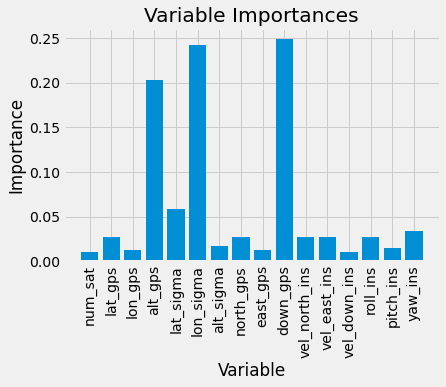

In [250]:
# Let us see which were the most important features for our regression

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Play around with some configurations of the feature space

In [253]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the most important features
important_indices = [feature_list.index('alt_gps'), feature_list.index('down_gps'), feature_list.index('lon_sigma'), feature_list.index('lat_sigma')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'meters.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.79 meters.
Accuracy: 45.49 %.


In [249]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract some important features
important_indices = [feature_list.index('lon_gps'), feature_list.index('lat_gps'), feature_list.index('lat_sigma'), feature_list.index('lon_sigma')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'meters.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.71 meters.
Accuracy: 56.04 %.


# Test 2. Train a Random Forest Classifier with all the data we have

In [262]:
full_df

,num_sat,lat_gps,lon_gps,alt_gps,lat_sigma,lon_sigma,alt_sigma,north_gps,east_gps,down_gps,...,vel_east_ins,vel_down_ins,roll_ins,pitch_ins,yaw_ins,geo_dist_gps_rtk,type_error_high,type_error_highest,type_error_low,type_error_lowest
0,9,51.760608,-1.261255,68.932093,2.098110,1.597030,5.599122,5.735843e+06,619997.177193,-68.932093,...,-0.012981,0.001167,0.041498,0.006991,4.745905,1.424384,0,0,1,0
1,9,51.760608,-1.261255,68.927470,2.097983,1.597024,5.599248,5.735843e+06,619997.176174,-68.927470,...,-0.009942,0.001832,0.041764,0.006839,4.745868,1.424165,0,0,1,0
2,9,51.760608,-1.261255,68.921052,2.098029,1.597101,5.599438,5.735843e+06,619997.185102,-68.921052,...,-0.011781,0.000832,0.041708,0.006833,4.745866,1.423003,0,0,1,0
3,9,51.760608,-1.261255,68.921958,2.097997,1.597131,5.599644,5.735843e+06,619997.183469,-68.921958,...,-0.011145,0.001088,0.041725,0.006851,4.745879,1.423359,0,0,1,0
4,9,51.760608,-1.261255,68.927044,2.097923,1.597114,5.599744,5.735843e+06,619997.187288,-68.927044,...,-0.010856,0.002007,0.041747,0.006834,4.745871,1.423844,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11451,10,51.760831,-1.261762,62.407233,1.872551,1.432219,3.647499,5.735867e+06,619961.590052,-62.407233,...,-0.055207,-0.007068,0.001099,-0.012628,1.258403,0.408504,0,0,0,1
11452,10,51.760832,-1.261761,62.510769,1.872550,1.432213,3.647423,5.735867e+06,619961.652986,-62.510769,...,-0.051035,-0.009839,0.001143,-0.012644,1.258469,0.311850,0,0,0,1
11453,10,51.760833,-1.261760,62.501980,1.870211,1.428933,3.642872,5.735867e+06,619961.702367,-62.501980,...,-0.053239,-0.011772,0.001042,-0.012640,1.258480,0.278667,0,0,0,1
11454,10,51.760826,-1.261760,63.597929,1.666002,1.418141,3.359005,5.735867e+06,619961.742779,-63.597929,...,-0.052281,-0.012674,0.001094,-0.012663,1.258477,0.987672,0,0,0,1


In [279]:
# Convert Pandas dataframe to numpy array to work in the algorithm

import numpy as np

# Labels are the values we want to predict, we want to predict the error in the GPS measurement
labels = np.array(full_df['type_error'])

# Remove the labels from the features
# axis 1 refers to the columns

full_df = full_df.drop(['geo_dist_gps_rtk','type_error'], axis = 1)

# Saving feature names for later use
feature_list = list(full_df.columns)
# Convert to numpy array
features = np.array(full_df)

print(features)


[[ 9.0000000e+00  5.1760608e+01 -1.2612550e+00 ...  4.1498000e-02
   6.9910000e-03  4.7459050e+00]
 [ 9.0000000e+00  5.1760608e+01 -1.2612550e+00 ...  4.1764000e-02
   6.8390000e-03  4.7458680e+00]
 [ 9.0000000e+00  5.1760608e+01 -1.2612550e+00 ...  4.1708000e-02
   6.8330000e-03  4.7458660e+00]
 ...
 [ 1.0000000e+01  5.1760833e+01 -1.2617600e+00 ...  1.0420000e-03
  -1.2640000e-02  1.2584800e+00]
 [ 1.0000000e+01  5.1760826e+01 -1.2617600e+00 ...  1.0940000e-03
  -1.2663000e-02  1.2584770e+00]
 [ 1.0000000e+01  5.1760826e+01 -1.2617600e+00 ...  1.0890000e-03
  -1.2644000e-02  1.2584720e+00]]


In [280]:
# Split the dataset in 75% and 25%

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (8592, 16)
Training Labels Shape: (8592,)
Testing Features Shape: (2864, 16)
Testing Labels Shape: (2864,)


In [282]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', max_depth = 100)
# Train the model on training data
rf.fit(train_features, train_labels)



RandomForestClassifier(criterion='entropy', max_depth=100, n_estimators=1000)

In [287]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predicting the Test set results
predictions = rf.predict(test_features)

accuracy_score(test_labels, predictions)
#Reverse factorize (converting y_pred from 0s,1s, 2s and 3 to lowest, low, high, highest errors
# reversefactor = dict(zip(range(4),definitions))
# y_test = np.vectorize(reversefactor.get)(y_test)
# y_pred = np.vectorize(reversefactor.get)(y_pred)
# # Making the Confusion Matrix
# print(pd.crosstab(y_test, y_pred, rownames=['Actual Species'], colnames=['Predicted Species']))

# View confusion matrix for test data and predictions
confusion_matrix(test_labels, predictions)

array([[ 519,  182,    0,    0],
       [ 123, 1574,   16,    0],
       [   1,   50,  247,    7],
       [   0,    1,    9,  135]])

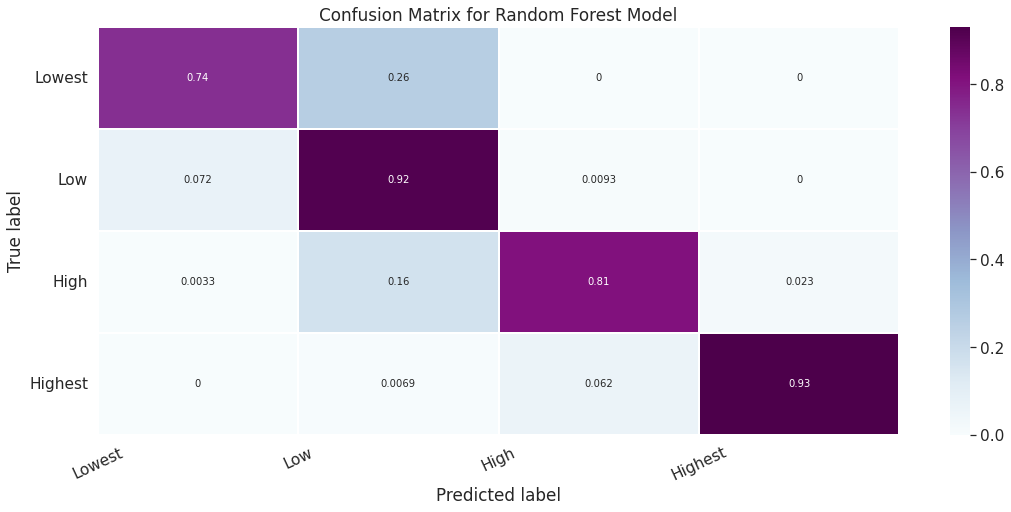

In [290]:
# Present confusion matrix
# Get and reshape confusion matrix data
import seaborn as sns

matrix = confusion_matrix(test_labels, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.BuPu, linewidths=0.2)

# Add labels to the plot
class_names = ['Lowest', 'Low', 'High', 'Highest']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [286]:
#Creating the dependent variable class
factor = pd.factorize(full_df['type_error'])
full_df.type_error = factor[0]
definitions = factor[1]
# print(full_df.type_error.head())
print(definitions)

Int64Index([0, 1, 2, 3], dtype='int64')


# Plots that show GPS, INS and RTK localization information

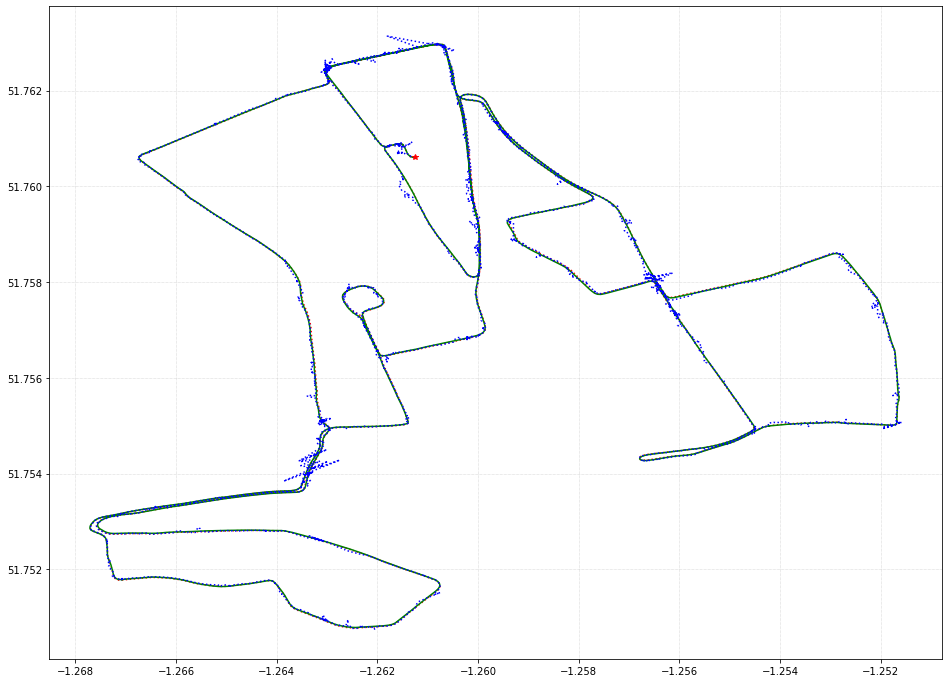

In [65]:
import matplotlib.pyplot as plt


figure = plt.gcf()
figure.set_size_inches(16,12)
plt.plot(rtk['longitude'],rtk['latitude'],'r:')
plt.plot(ins['longitude'],ins['latitude'],'g')
plt.plot(gps['longitude'],gps['latitude'],'b:')
plt.plot(gps['longitude'][0],gps['latitude'][0],'r*')
plt.grid(linestyle=':',linewidth=0.5)
plt.savefig('Latitud vs Longitude Resampled',dpi=200)

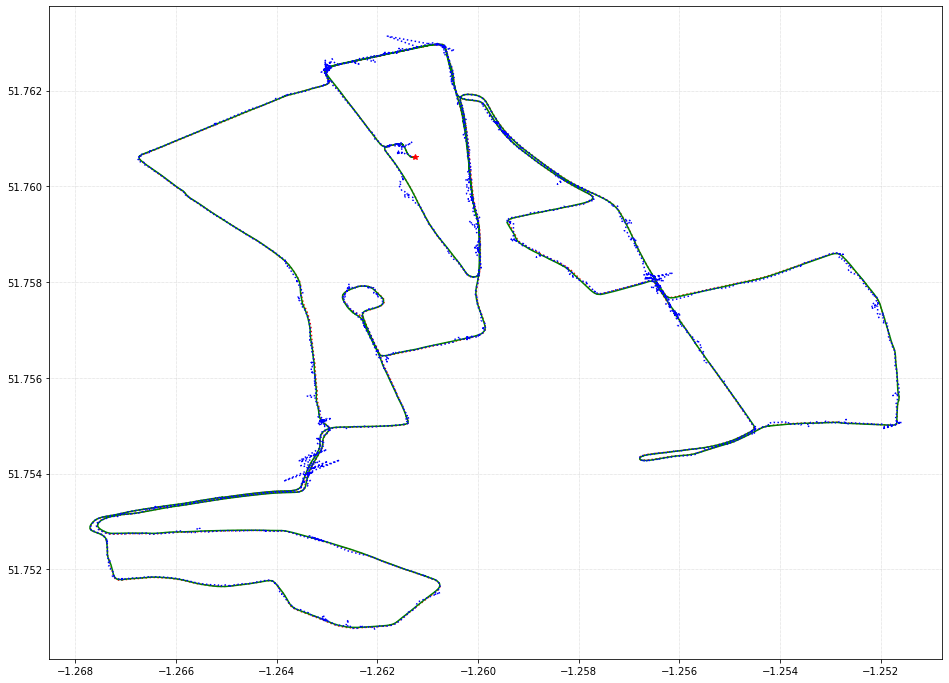

In [113]:
import matplotlib.pyplot as plt


figure = plt.gcf()
figure.set_size_inches(16,12)
plt.plot(rtk_lon,rtk_lat,'r:')
plt.plot(ins_lon,ins_lat,'g')
plt.plot(gps_lon,gps_lat,'b:')
plt.plot(gps_lon[0],gps_lat[0],'r*')
plt.grid(linestyle=':',linewidth=0.5)
plt.savefig('Latitud vs Longitude',dpi=200)


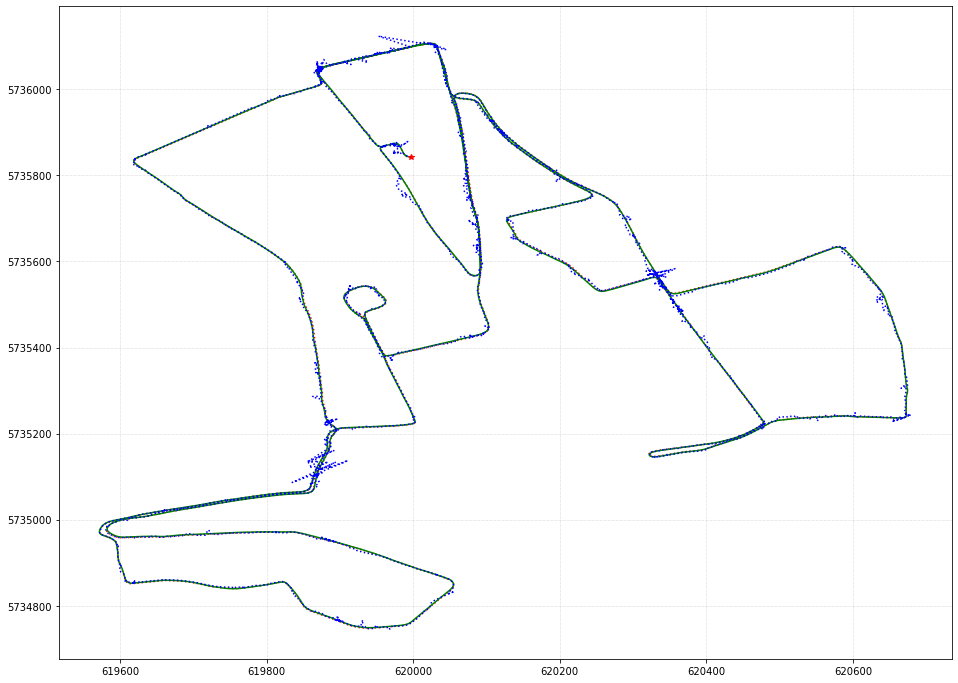

In [112]:
import matplotlib.pyplot as plt


figure = plt.gcf()
figure.set_size_inches(16,12)
plt.plot(rtk_east,rtk_north,'r:')
plt.plot(ins_east,ins_north,'g')
plt.plot(gps_east,gps_north,'b:')
plt.plot(gps_east[0],gps_north[0],'r*')
plt.grid(linestyle=':',linewidth=0.5)
plt.savefig('Northing vs Easting',dpi=200)

### Loading model data

In [69]:
import numpy as np
training_folder = 'training_data/'
# instantiate empty arrays for features and labels
Xdata = np.array([])
ydata = np.array([])
k = 0 # initialize

# load data from the relevant files
while True:
    try:
        # load data file
        class_k = np.loadtxt(training_folder + 'Class{:}.csv'.format(k))
        # extract features and labels
        class_k_features = class_k[:,:-1] # extract features
        class_k_labels  = class_k[:,-1].astype(np.int) # labels; convert to int
        # append the features and labels to the arrays
        Xdata = np.vstack([Xdata,class_k_features]) if Xdata.size else class_k_features
        ydata = np.hstack([ydata,class_k_labels]) if ydata.size else class_k_labels
        # increment counter
        k += 1
    except:
        print('loaded %i classes of training data' %k)
        break

# examine shape
num_classes = k
num_features = Xdata.shape[1]
num_samples = Xdata.shape[0]

/tmp/ipykernel_62683/2775371038.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  class_k_labels  = class_k[:,-1].astype(np.int) # labels; convert to int


loaded 20 classes of training data


In [70]:
print(f'k is {k}, number of features is {num_features} and number of samples is {num_samples}')

k is 20, number of features is 20 and number of samples is 100000


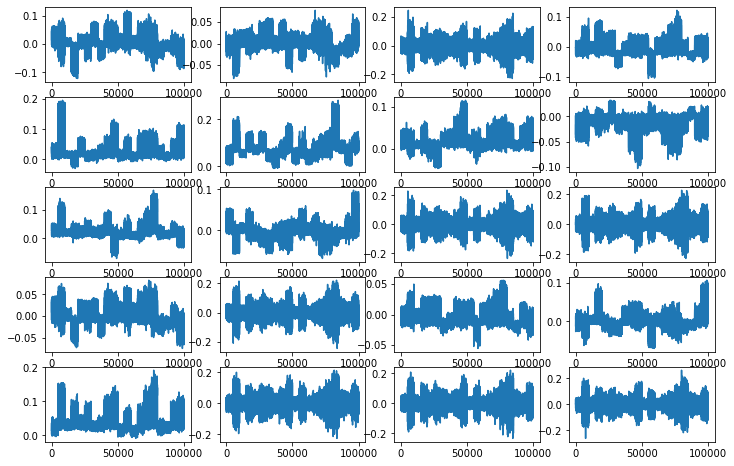

In [3]:
# Visualize the data values
import matplotlib.pyplot as plt
plt_size = [12, 8]
plt.figure(figsize=plt_size)
for i in range(20):
    plt.subplot(5,4,i + 1)
    plt.plot(Xdata[:, i])

We observe that the data have different amplitudes and can be centered. While Random Forests is not affected by normalization, the feature importances are affected by it. [ https://explained.ai/rf-importance/index.html ]
We tested normalizing the data but no effect was observed. 

In [4]:
# Define the random forest classifier
from sklearn.ensemble import RandomForestClassifier
#from cuml import RandomForestClassifier

In [5]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import time

# kf = KFold(n_splits = 5, shuffle=True)

X_tr, X_ts, y_tr, y_ts = train_test_split(Xdata, ydata, test_size=0.2)

nEst = [100,150, 200,500,700,1000,1200]
acc = np.zeros(len(nEst))
exec_time = np.zeros(len(nEst))

for n_idx, nEst_val in enumerate(nEst):
    start = time.time()
    clf = RandomForestClassifier(n_estimators=nEst_val, max_depth = 100 )
    clf.fit(X_tr, y_tr)
    end = time.time()
    exec_time[n_idx] = (end - start)/60.0 # time in mins
    y_hat = clf.predict(X_ts)

    acc[n_idx] = metrics.accuracy_score(y_ts, y_hat)
    print("Mean Accuracy for {0:1d} trees is {1:2.4f}: ".format(nEst[n_idx], acc[n_idx]))

# Save for later validatoin
Xts = X_ts
yts = y_ts

Mean Accuracy for 100 trees is 0.8942: 
Mean Accuracy for 150 trees is 0.8946: 
Mean Accuracy for 200 trees is 0.8955: 
Mean Accuracy for 500 trees is 0.8960: 
Mean Accuracy for 700 trees is 0.8948: 
Mean Accuracy for 1000 trees is 0.8960: 
Mean Accuracy for 1200 trees is 0.8965: 


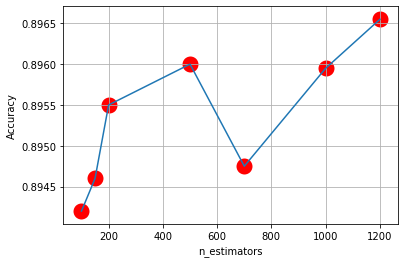

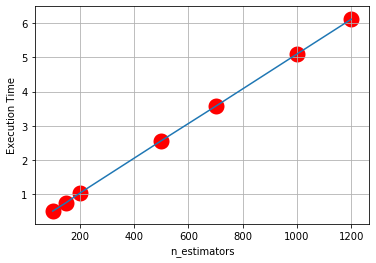

In [6]:
# Plot accuracy vs n_estimators
plt.plot(nEst, acc)
plt.scatter(nEst, acc,linewidths=10, c='r')
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()

plt.figure()
plt.plot(nEst, exec_time)
plt.scatter(nEst, exec_time,linewidths=10, c='r')
plt.xlabel("n_estimators")
plt.ylabel("Execution Time")
plt.grid()

We observe that 500 is the optimal parameter. Then we do a line search for parameter max_depth

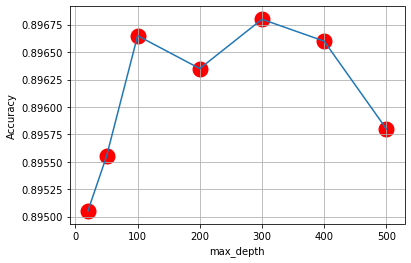

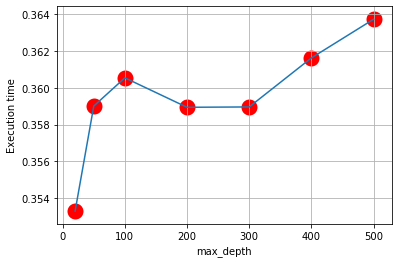

In [7]:
X_tr, X_ts, y_tr, y_ts = train_test_split(Xdata, ydata, test_size=0.2)
mdepth = [20, 50, 100, 200, 300, 400, 500]
acc = []
exec_time = []
for depth in mdepth:
    start = time.time()
    clf = RandomForestClassifier(n_estimators=500, max_depth=depth, n_jobs=-1)
    clf.fit(X_tr, y_tr)
    end = time.time()
    y_hat = clf.predict(X_ts)
    acc.append(metrics.accuracy_score(y_ts, y_hat))
    exec_time.append((end - start)/60.0)

plt.plot(mdepth, acc)
plt.scatter(mdepth, acc,linewidths=10, c='r')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid()

plt.figure()
plt.plot(mdepth, exec_time)
plt.scatter(mdepth, exec_time,linewidths=10, c='r')
plt.xlabel("max_depth")
plt.ylabel("Execution time")
plt.grid()

Let's choose a max_depth of 50 which provides a good tradeoff between computational time and performance. Now, let's investigate one more parameter: min_sample_split

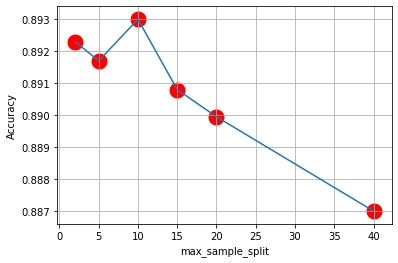

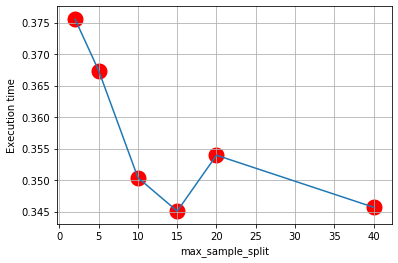

In [8]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(Xdata, ydata, test_size=0.2)
msplit = [2, 5, 10, 15, 20,40]
acc = []
exec_time = []
for split in msplit:
    start = time.time()
    clf = RandomForestClassifier(n_estimators=500, max_depth=50, min_samples_split=split, n_jobs=-1)
    clf.fit(X_tr, y_tr)
    end = time.time()
    y_hat = clf.predict(X_ts)
    acc.append(metrics.accuracy_score(y_ts, y_hat))
    exec_time.append((end - start)/60.0)

plt.figure()
plt.plot(msplit, acc)
plt.scatter(msplit, acc,linewidths=10, c='r')
plt.xlabel("max_sample_split")
plt.ylabel("Accuracy")
plt.grid()

plt.figure()
plt.plot(msplit, exec_time)
plt.scatter(msplit, exec_time,linewidths=10, c='r')
plt.xlabel("max_sample_split")
plt.ylabel("Execution time")
plt.grid()

Let's choose a max_samples_split of 5. Finally, we will investigate the parameters min_sample_leaf

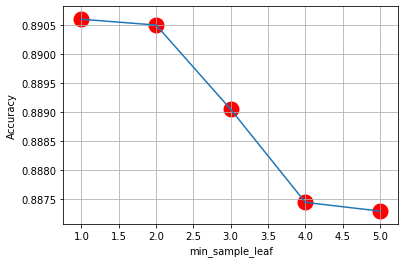

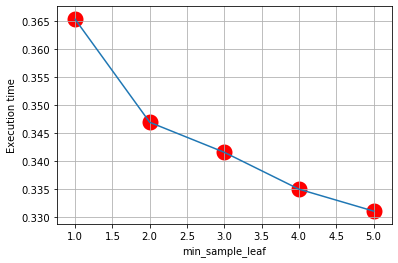

In [9]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(Xdata, ydata, test_size=0.2)
mleaf = [1, 2, 3, 4, 5]
acc = []
exec_time = []
for leaf in mleaf:
    start = time.time()
    clf = RandomForestClassifier(n_estimators=500, max_depth=50, min_samples_split=5, min_samples_leaf=leaf, n_jobs=-1)
    clf.fit(X_tr, y_tr)
    end = time.time()
    y_hat = clf.predict(X_ts)
    acc.append(metrics.accuracy_score(y_ts, y_hat))
    exec_time.append((end - start)/60.0)

plt.figure()
plt.plot(mleaf, acc)
plt.scatter(mleaf, acc,linewidths=10, c='r')
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.grid()

plt.figure()
plt.plot(mleaf, exec_time)
plt.scatter(mleaf, exec_time,linewidths=10, c='r')
plt.xlabel("min_sample_leaf")
plt.ylabel("Execution time")
plt.grid()

The best value for min_sample_leaf is 1.

### Extract important features to perform feature selection

Feature Importances:  [0.05086064 0.08140177 0.00790235 0.07451532 0.09565456 0.10492626
 0.06235158 0.05587287 0.08157503 0.07955168 0.00807544 0.00787058
 0.06303139 0.00789882 0.06194316 0.06047968 0.07235621 0.00781294
 0.00797969 0.00794001]


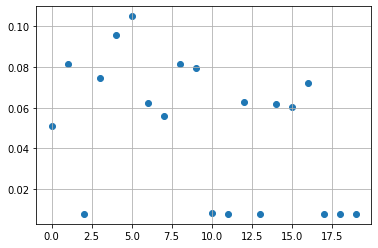

In [78]:
from sklearn.ensemble import RandomForestClassifier
X_tr, X_ts, y_tr, y_ts = train_test_split(Xdata, ydata, test_size=0.2)  
clf = RandomForestClassifier(n_estimators=500, max_depth=50, min_samples_split=5, min_samples_leaf=1,  n_jobs=-1)
clf.fit(X_tr, y_tr)
print("Feature Importances: ", clf.feature_importances_)
plt.scatter(np.arange(0, num_classes), clf.feature_importances_)
plt.grid()

Discard features one by one starting from the least significative 

In [79]:
feature_order = np.argsort(clf.feature_importances_)
print("Sorting features by low-to-high importance: ", feature_order)

Sorting features by low-to-high importance:  [17 11 13  2 19 18 10  0  7 15 14  6 12 16  3  9  1  8  4  5]


### Repeat classification

In [80]:
# Consider only the most N import features N in {13, 14, ..., 20}
f_start = 13
f_end = 20
acc_im = np.zeros(f_end-f_start+1)
for N in np.arange(f_start,f_end + 1):
    features = feature_order[20-N:]
    X_tr_im = X_tr[:, features]
    X_ts_im = X_ts[:, features]
    clf_im = RandomForestClassifier(n_estimators=500, max_depth=200, min_samples_split=5, min_samples_leaf=1,  n_jobs=-1)
    clf_im.fit(X_tr_im, y_tr)
    y_hat = clf_im.predict(X_ts_im)
    acc_im[N-f_start] = metrics.accuracy_score(y_ts, y_hat)
    print("Accuracy: ", acc_im[N-f_start])

Accuracy:  0.8919
Accuracy:  0.8921
Accuracy:  0.89125
Accuracy:  0.892
Accuracy:  0.89235
Accuracy:  0.8934
Accuracy:  0.89375
Accuracy:  0.89345


Accuracy:  0.89375


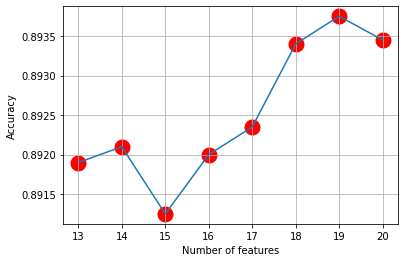

In [81]:
# Plot the accuracy vs number of (most important) features
plt.figure
plt.plot(np.arange(f_start,f_end+1), acc_im)
plt.scatter(np.arange(f_start,f_end+1), acc_im,linewidths=10, c='r')
plt.grid()
plt.xlabel("Number of features")
plt.ylabel("Accuracy")

print("Accuracy: ", np.max(acc_im))

In [22]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(Xdata, ydata, test_size=0.2)  
clf = RandomForestClassifier(n_estimators=500, max_depth=50, min_samples_split=5, min_samples_leaf=1,  n_jobs=-1)
clf.fit(X_tr, y_tr)
y_hat = clf.predict(X_ts)
print("Accuracy: ", metrics.accuracy_score(y_ts, y_hat))

Accuracy:  0.89495


### Conclusion
Eliminating the features that contribute provide a slight worse change on the accuracy. We will use the full feature vector for prediction

In [23]:
filename = 'random_forest_model.sav'
# Exporting directly on pickle generates a large file of almost 900MB
# instead we will compress the file before saving it with pickle
#pickle.dump(clf, open(filename, 'wb'))
clf = RandomForestClassifier(n_estimators=500, max_depth=50, min_samples_split=5, min_samples_leaf=1,  n_jobs=-1)
clf.fit(Xdata, ydata)

RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=500,
                       n_jobs=-1)

In [24]:
# Compress 
import joblib
#sfile = bz2.BZ2File(filename, 'w')
joblib.dump(clf, filename, compress=True)

['random_forest_model.sav']

### Check if model has been properly saved

In [25]:
from sklearn import metrics
loaded_model = joblib.load(open(filename, 'rb'))
y_hat_model = loaded_model.predict(X_ts)
print("Accuracy of loaded model: ", metrics.accuracy_score(y_ts, y_hat_model))

Accuracy of loaded model:  0.9999
